<h1>TRADE CALL PREDICTION USING CLASSIFICATION </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('outputFile/week3.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)


In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Day_Perc_Change,Trend,Volatility,SMA_21,LMA_34,Trade_Call,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
0,2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,...,0.000000,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
1,2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,...,0.362566,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
2,2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,...,-0.230366,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
3,2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,...,0.939337,Slight Positive,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
4,2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,...,-0.395113,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN


In [4]:
def call(row):
    if row["Close Price"] < row["14_day_bollinger_lower"]: return "Buy"
    if row["Close Price"] > row["14_day_bollinger_upper"]: return "Short"
    if row["Close Price"] == row["14_day_bollinger_upper"]: return "Hold"
    if row["Close Price"] > row["14_day_SMA"]: return "Hold Buy / Liquidate Short"
    if row["Close Price"] < row["14_day_SMA"]: return "Hold Short / Liquidate Buy"

df["Call"] = df.apply(call, axis = 1)
df


,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Trend,Volatility,SMA_21,LMA_34,Trade_Call,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call
0,2017-05-15,INFY,EQ,964.25,963.50,963.50,949.10,953.25,951.55,951.49,...,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
1,2017-05-16,INFY,EQ,951.55,953.10,960.15,946.95,956.00,955.00,952.92,...,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
2,2017-05-17,INFY,EQ,955.00,951.60,958.45,943.85,952.90,952.80,949.48,...,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
3,2017-05-18,INFY,EQ,952.80,943.00,973.90,942.85,960.25,961.75,962.61,...,Slight Positive,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
4,2017-05-19,INFY,EQ,961.75,961.50,962.70,947.85,957.40,957.95,954.18,...,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-05-07,INFY,EQ,718.40,720.40,727.90,718.70,724.40,724.55,724.51,...,Slight Positive,0.042474,738.147619,736.216176,HODL,729.810714,10.288365,750.387444,709.233984,Hold Short / Liquidate Buy
490,2019-05-08,INFY,EQ,724.55,721.00,726.00,716.50,718.95,719.35,721.65,...,Slight Negative,0.041786,736.530952,736.539706,SELL,727.782143,9.223936,746.230016,709.334270,Hold Short / Liquidate Buy
491,2019-05-09,INFY,EQ,719.35,719.15,730.30,715.80,722.00,721.05,724.48,...,Slight or No Change,0.038670,735.252381,736.613235,HODL,727.321429,9.398542,746.118512,708.524346,Hold Short / Liquidate Buy
492,2019-05-10,INFY,EQ,721.05,720.80,726.00,715.00,716.50,716.85,717.88,...,Slight Negative,0.029632,733.230952,736.808824,HODL,726.803571,9.781625,746.366821,707.240322,Hold Short / Liquidate Buy


In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
x=df[['Close Price','14_day_STD','14_day_bollinger_upper','14_day_bollinger_lower']].dropna()
y=df['Call'].dropna()


In [7]:
y.unique()

array(['Hold Buy / Liquidate Short', 'Hold Short / Liquidate Buy', 'Buy',
       'Short'], dtype=object)

In [8]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

<h3>Applying Various Classification Model</h3>
<h4> Logistic regression </h4>

In [10]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_lg=lg.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_lg))
print(confusion_matrix(y_test,y_lg))
print(classification_report(y_test,y_lg))

0.7103448275862069
[[ 0  1  6  0]
 [ 0 68  5  0]
 [ 0 25 35  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.69      0.93      0.79        73
Hold Short / Liquidate Buy       0.76      0.58      0.66        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.71       145
                 macro avg       0.36      0.38      0.36       145
              weighted avg       0.66      0.71      0.67       145



<h4> KNN </h4>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)

In [13]:
print(accuracy_score(y_test,y_knn))
print(confusion_matrix(y_test,y_knn))
print(classification_report(y_test,y_knn))

0.8413793103448276
[[ 0  0  7  0]
 [ 0 69  4  0]
 [ 0  8 52  0]
 [ 0  4  0  1]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.85      0.95      0.90        73
Hold Short / Liquidate Buy       0.83      0.87      0.85        60
                     Short       1.00      0.20      0.33         5

                  accuracy                           0.84       145
                 macro avg       0.67      0.50      0.52       145
              weighted avg       0.80      0.84      0.81       145



<h4> SVM </h4>

In [14]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_svc=svc.predict(x_test)

In [15]:
print(accuracy_score(y_test,y_svc))
print(confusion_matrix(y_test,y_svc))
print(classification_report(y_test,y_svc))

0.593103448275862
[[ 0  3  4  0]
 [ 0 55 18  0]
 [ 1 28 31  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.60      0.75      0.67        73
Hold Short / Liquidate Buy       0.58      0.52      0.55        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.59       145
                 macro avg       0.30      0.32      0.30       145
              weighted avg       0.55      0.59      0.56       145



<h4> SVM RBF </h4>


In [16]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=1.2,gamma=1)
svc.fit(x_train,y_train)
y_rbf=svc.predict(x_test)

In [17]:
print(accuracy_score(y_test,y_rbf))
print(confusion_matrix(y_test,y_rbf))
print(classification_report(y_test,y_rbf))

0.7241379310344828
[[ 0  0  7  0]
 [ 0 67  6  0]
 [ 0 22 38  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.71      0.92      0.80        73
Hold Short / Liquidate Buy       0.75      0.63      0.68        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.72       145
                 macro avg       0.36      0.39      0.37       145
              weighted avg       0.67      0.72      0.69       145



<h4> Decision Trees </h4>

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt=dt.predict(x_test)


In [19]:
print(accuracy_score(y_test,y_dt))
print(confusion_matrix(y_test,y_dt))
print(classification_report(y_test,y_dt))


0.7241379310344828
[[ 0  0  7  0]
 [ 0 59  5  9]
 [ 4  7 46  3]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.83      0.81      0.82        73
Hold Short / Liquidate Buy       0.79      0.77      0.78        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.72       145
                 macro avg       0.41      0.39      0.40       145
              weighted avg       0.75      0.72      0.74       145



<h4> RandomForest </h4>

In [20]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier(n_estimators=100)
rd.fit(x_train,y_train)
y_rd=rd.predict(x_test)

In [21]:
print(accuracy_score(y_test,y_rd))
print(confusion_matrix(y_test,y_rd))
print(classification_report(y_test,y_rd))

0.7862068965517242
[[ 0  0  7  0]
 [ 0 66  6  1]
 [ 0 12 48  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.80      0.90      0.85        73
Hold Short / Liquidate Buy       0.79      0.80      0.79        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.79       145
                 macro avg       0.40      0.43      0.41       145
              weighted avg       0.73      0.79      0.75       145



<h4> Naive Bayes </h4>

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_gnb=gnb.predict(x_test)

In [23]:
print(accuracy_score(y_test,y_gnb))
print(confusion_matrix(y_test,y_gnb))
print(classification_report(y_test,y_gnb))

0.496551724137931
[[ 0  6  1  0]
 [ 0 69  4  0]
 [ 4 53  3  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.52      0.95      0.67        73
Hold Short / Liquidate Buy       0.38      0.05      0.09        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.50       145
                 macro avg       0.22      0.25      0.19       145
              weighted avg       0.42      0.50      0.37       145



<h3> Neural Network </h3>

In [24]:
from sklearn.neural_network import MLPClassifier


In [25]:
neural_net=MLPClassifier(alpha=1,max_iter=2000)
neural_net.fit(x_train,y_train)
y_neural=neural_net.predict(x_test)



In [26]:
print(accuracy_score(y_test,y_neural))
print(confusion_matrix(y_test,y_neural))
print(classification_report(y_test,y_neural))

0.8896551724137931
[[ 0  0  7  0]
 [ 0 73  0  0]
 [ 1  3 56  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.90      1.00      0.95        73
Hold Short / Liquidate Buy       0.89      0.93      0.91        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.89       145
                 macro avg       0.45      0.48      0.46       145
              weighted avg       0.82      0.89      0.85       145



In [27]:
#3rd Part

In [28]:
df_tcs=pd.read_csv('TCS.csv')


In [29]:
df_tcs=df_tcs[df_tcs.Series=='EQ']
df_tcs=df_tcs.reset_index(drop=True)

In [30]:
df_tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
490,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
491,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27
492,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81


In [31]:
df_tcs["14_day_SMA"] = df_tcs['Close Price'].rolling(14).mean()
df_tcs["14_day_STD"] = df_tcs['Close Price'].rolling(14).std()
df_tcs["14_day_bollinger_upper"] = df_tcs["14_day_SMA"] + df_tcs["14_day_STD"] * 2
df_tcs["14_day_bollinger_lower"] = df_tcs["14_day_SMA"] - df_tcs["14_day_STD"] * 2


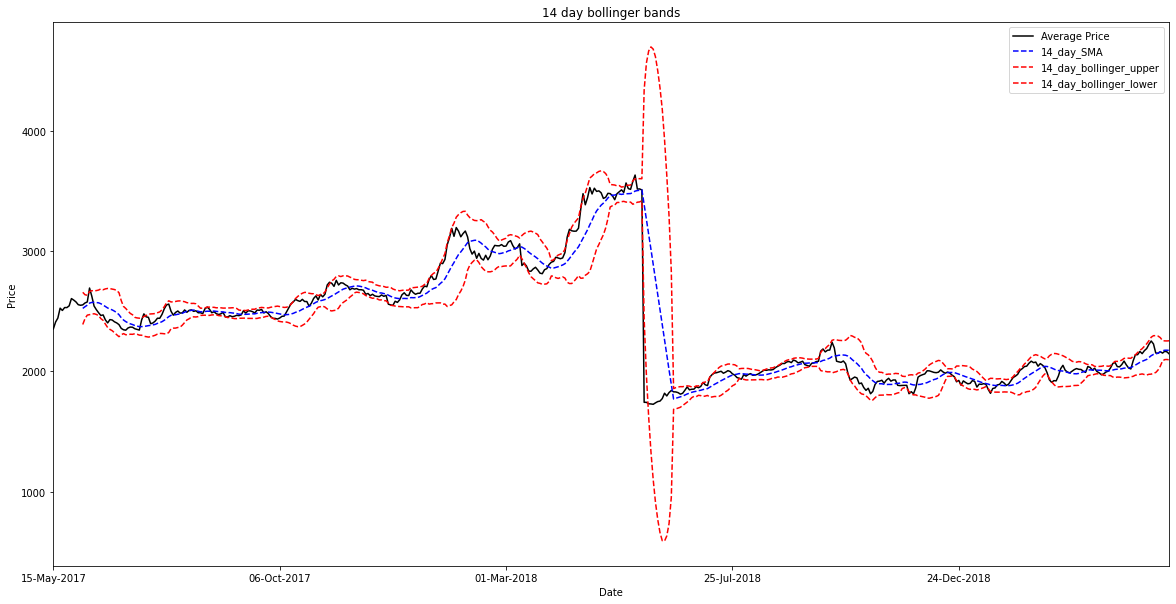

In [32]:
plt.figure(figsize=(20,10))
ax = plt.gca()

df_tcs.plot(kind='line',x='Date', y='Average Price', ax=ax, color='black')
df_tcs.plot(kind='line',x='Date', y='14_day_SMA',    ax=ax, color='blue', linestyle='--')
df_tcs.plot(kind='line',x='Date', y='14_day_bollinger_upper',    ax=ax, color='red', linestyle='--')
df_tcs.plot(kind='line',x='Date', y='14_day_bollinger_lower',    ax=ax, color='red', linestyle='--')


plt.title("14 day bollinger bands")
plt.ylabel("Price")
plt.show()


In [33]:
df_tcs=df_tcs.dropna()
x = scaler.fit_transform( df_tcs[['Close Price', '14_day_STD', '14_day_bollinger_upper', '14_day_bollinger_lower']] )
df_tcs['Call']  = neural_net.predict( x)  # using previously trained neural network


In [34]:
def call(row):
    if row["Close Price"] < row["14_day_bollinger_lower"]: return "Buy"
    if row["Close Price"] > row["14_day_bollinger_upper"]: return "Short"
    if row["Close Price"] == row["14_day_bollinger_upper"]: return "Hold"
    if row["Close Price"] > row["14_day_SMA"]: return "Hold Buy / Liquidate Short"
    if row["Close Price"] < row["14_day_SMA"]: return "Hold Short / Liquidate Buy"

df_tcs['Call_new']=df_tcs.apply(call,axis=1)
df_tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call,Call_new
13,TCS,EQ,01-Jun-2017,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,...,1.378618e+09,38315,370004,68.52,2523.725000,66.942093,2657.609185,2389.840815,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
14,TCS,EQ,02-Jun-2017,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,...,1.741220e+09,43736,511928,75.53,2537.996429,49.565983,2637.128396,2438.864462,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
15,TCS,EQ,05-Jun-2017,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,...,1.933140e+09,39041,490594,65.40,2550.482143,41.378230,2633.238603,2467.725683,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
16,TCS,EQ,06-Jun-2017,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,...,8.007781e+09,132494,1888281,63.51,2567.671429,48.235618,2664.142666,2471.200192,Hold Buy / Liquidate Short,Short
17,TCS,EQ,07-Jun-2017,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,...,6.467589e+09,109104,1265805,51.37,2573.317857,48.890532,2671.098920,2475.536794,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,...,4.763441e+09,86096,975603,44.31,2161.478571,59.600654,2280.679880,2042.277263,Hold Short / Liquidate Buy,Hold Short / Liquidate Buy
490,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,...,3.926902e+09,77713,781526,42.83,2171.360714,42.320799,2256.002313,2086.719115,Hold Short / Liquidate Buy,Hold Short / Liquidate Buy
491,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,...,4.906405e+09,106297,1251459,55.27,2175.592857,38.891629,2253.376115,2097.809600,Hold Short / Liquidate Buy,Hold Short / Liquidate Buy
492,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,...,4.409349e+09,85446,873181,42.81,2175.878571,38.558426,2252.995423,2098.761720,Hold Short / Liquidate Buy,Hold Short / Liquidate Buy


In [35]:
y_pred=df_tcs['Call']
y_actual=df_tcs['Call_new']
print("accuracy using neural network",accuracy_score(y_actual,y_pred))

accuracy using neural network 0.83991683991684


In [36]:
print(classification_report(y_actual,y_pred))

                            precision    recall  f1-score   support

                       Buy       0.50      0.13      0.21        15
Hold Buy / Liquidate Short       0.88      0.89      0.88       261
Hold Short / Liquidate Buy       0.80      0.94      0.87       181
                     Short       0.00      0.00      0.00        24

                  accuracy                           0.84       481
                 macro avg       0.54      0.49      0.49       481
              weighted avg       0.79      0.84      0.81       481



In [37]:
df_tcs['Call'].unique()

array(['Hold Buy / Liquidate Short', 'Hold Short / Liquidate Buy', 'Buy'],
      dtype=object)

<h4> Neural Networks gave the highest accuracy out of all the classifications model which is 83 percent </h4>


<h3> 4.2 </h3>

In [38]:
df_rel=pd.read_csv('RELIANCE.csv')
df_rel['Date']=pd.to_datetime(df_rel['Date'])
df_rel.set_index('Date', drop=False, inplace=True)

df_rel.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
2017-05-16,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2017-05-17,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
2017-05-18,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
2017-05-19,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32


In [39]:
df_rel["Per_Change_Open_Close"] = (df_rel["Close Price"] - df_rel["Open Price"])/ df_rel["Open Price"]
df_rel["Per_Change_High_Low"] = (df_rel["High Price"] - df_rel["Low Price"])/ df_rel["Low Price"]
close_price_pct_change = df_rel["Close Price"].pct_change()
df_rel["Day_Perc_Change"] = close_price_pct_change.fillna(0)
df_rel["5_Day_Mean"] = df_rel["Day_Perc_Change"].rolling(5).mean()
df_rel["5_Day_STD"] = df_rel["Day_Perc_Change"].rolling(5).std()
df_rel


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Per_Change_Open_Close,Per_Change_High_Low,Day_Perc_Change,5_Day_Mean,5_Day_STD
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12,-0.009068,0.017173,0.000000,NaN,NaN
2017-05-16,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,0.007615,0.026771,0.009077,NaN,NaN
2017-05-17,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,0.000074,0.013504,-0.002359,NaN,NaN
2017-05-18,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,-0.009625,0.019560,-0.019030,NaN,NaN
2017-05-19,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,-0.010615,0.019618,-0.006404,-0.003743,0.010260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RELIANCE,EQ,2019-05-07,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81,-0.036779,0.040889,-0.029894,-0.007079,0.015943
2019-05-08,RELIANCE,EQ,2019-05-08,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38,-0.030261,0.036991,-0.032787,-0.013636,0.018792
2019-05-09,RELIANCE,EQ,2019-05-09,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65,-0.025101,0.029599,-0.033091,-0.022013,0.015305


In [40]:
df_rel.reset_index(drop=True)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Per_Change_Open_Close,Per_Change_High_Low,Day_Perc_Change,5_Day_Mean,5_Day_STD
0,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12,-0.009068,0.017173,0.000000,NaN,NaN
1,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,0.007615,0.026771,0.009077,NaN,NaN
2,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,0.000074,0.013504,-0.002359,NaN,NaN
3,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,-0.009625,0.019560,-0.019030,NaN,NaN
4,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,-0.010615,0.019618,-0.006404,-0.003743,0.010260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,RELIANCE,EQ,2019-05-07,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81,-0.036779,0.040889,-0.029894,-0.007079,0.015943
491,RELIANCE,EQ,2019-05-08,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38,-0.030261,0.036991,-0.032787,-0.013636,0.018792
492,RELIANCE,EQ,2019-05-09,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65,-0.025101,0.029599,-0.033091,-0.022013,0.015305
493,RELIANCE,EQ,2019-05-10,1256.45,1265.00,1277.70,1245.00,1245.75,1251.15,1263.56,11226831,1.418577e+10,231193,3221387,28.69,-0.010949,0.026265,-0.004218,-0.023398,0.012581


In [41]:
df_rel['Action'] = np.where( df_rel['Close Price'].shift(-1) > df_rel['Close Price'], 1, -1 )


In [42]:
df_rel

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Per_Change_Open_Close,Per_Change_High_Low,Day_Perc_Change,5_Day_Mean,5_Day_STD,Action
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,...,2.070379e+09,75812,802733,52.12,-0.009068,0.017173,0.000000,NaN,NaN,1
2017-05-16,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,...,3.936121e+09,79767,1238129,42.80,0.007615,0.026771,0.009077,NaN,NaN,-1
2017-05-17,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,...,3.047263e+09,56277,1225837,54.47,0.000074,0.013504,-0.002359,NaN,NaN,-1
2017-05-18,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,...,2.990178e+09,84723,1339478,59.85,-0.009625,0.019560,-0.019030,NaN,NaN,-1
2017-05-19,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,...,3.871940e+09,115988,1444387,49.32,-0.010615,0.019618,-0.006404,-0.003743,0.010260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RELIANCE,EQ,2019-05-07,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,...,1.208739e+10,214252,4066700,45.81,-0.036779,0.040889,-0.029894,-0.007079,0.015943,-1
2019-05-08,RELIANCE,EQ,2019-05-08,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,...,1.918510e+10,354813,6922545,47.38,-0.030261,0.036991,-0.032787,-0.013636,0.018792,-1
2019-05-09,RELIANCE,EQ,2019-05-09,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,...,2.467876e+10,389079,9685998,49.65,-0.025101,0.029599,-0.033091,-0.022013,0.015305,-1


In [43]:
from sklearn.ensemble import RandomForestClassifier
df_rel.dropna(inplace=True)
x=df_rel[['Per_Change_Open_Close','Per_Change_High_Low','5_Day_Mean','5_Day_STD']]
y=df_rel['Action']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [44]:
df_rel

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Per_Change_Open_Close,Per_Change_High_Low,Day_Perc_Change,5_Day_Mean,5_Day_STD,Action
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-19,RELIANCE,EQ,2017-05-19,1327.35,1333.0,1335.70,1310.00,1318.20,1318.85,1321.99,...,3.871940e+09,115988,1444387,49.32,-0.010615,0.019618,-0.006404,-0.003743,0.010260,1
2017-05-22,RELIANCE,EQ,2017-05-22,1318.85,1326.5,1333.60,1315.20,1326.00,1324.15,1322.82,...,2.661318e+09,89828,1123947,55.87,-0.001772,0.013990,0.004019,-0.002940,0.010771,-1
2017-05-23,RELIANCE,EQ,2017-05-23,1324.15,1325.7,1329.85,1302.00,1304.55,1305.55,1313.55,...,2.769247e+09,81667,1172410,55.61,-0.015200,0.021390,-0.014047,-0.007564,0.009166,-1
2017-05-24,RELIANCE,EQ,2017-05-24,1305.55,1307.5,1313.70,1295.10,1299.00,1297.70,1302.71,...,4.266122e+09,78535,1782580,54.43,-0.007495,0.014362,-0.006013,-0.008295,0.008786,1
2017-05-25,RELIANCE,EQ,2017-05-25,1297.70,1300.0,1312.40,1296.45,1301.50,1302.45,1303.19,...,7.721843e+09,114553,4678965,78.97,0.001885,0.012303,0.003660,-0.003757,0.007640,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RELIANCE,EQ,2019-05-07,1384.90,1394.8,1395.00,1340.20,1341.00,1343.50,1361.64,...,1.208739e+10,214252,4066700,45.81,-0.036779,0.040889,-0.029894,-0.007079,0.015943,-1
2019-05-08,RELIANCE,EQ,2019-05-08,1343.50,1340.0,1340.00,1292.20,1297.75,1299.45,1313.10,...,1.918510e+10,354813,6922545,47.38,-0.030261,0.036991,-0.032787,-0.013636,0.018792,-1
2019-05-09,RELIANCE,EQ,2019-05-09,1299.45,1288.8,1288.80,1251.75,1253.15,1256.45,1265.10,...,2.467876e+10,389079,9685998,49.65,-0.025101,0.029599,-0.033091,-0.022013,0.015305,-1


In [45]:
rd=RandomForestClassifier(n_estimators=1000)
rd.fit(x_train,y_train)
y_rd=rd.predict(x_test)
print(accuracy_score(y_test,y_rd))

0.5405405405405406


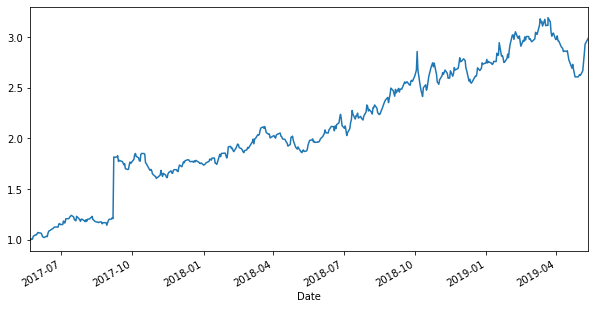

In [46]:
plt.figure(figsize=(10,5))
cumulative_returns = ( 1 + (df_rel['Close Price'].pct_change() * df_rel['Action']) ).dropna().cumprod()
cumulative_returns.plot()

